Name: Lim Yu Yang Ian

Class: DAAA/FT/2A/02

Admin No: 2201874

# Importing modules

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
import warnings
from itertools import product
from pathlib import Path
import scipy.stats as stats

# Importing tools for encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from random import sample

# Importing models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples, adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure
from sklearn.datasets import make_blobs

# Importing other necessary modules
from numpy.random import uniform
import numpy as np
from math import isnan
from itertools import combinations

c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Set Up

In [2]:
df = pd.read_csv("../ST1511-CA2-dataset/Customer_Dataset.csv")
df.head()

,CustomerID,Gender,Age,Income (k$),How Much They Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
default = (10, 5)
sns.set_style("darkgrid")

# EDA

In [4]:
df_eda = df.copy()

In [5]:
df_eda.shape

(200, 5)

In [6]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Income (k$)          200 non-null    int64 
 4   How Much They Spend  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df_eda.describe()

,CustomerID,Age,Income (k$),How Much They Spend
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df_eda.isna().sum()

CustomerID             0
Gender                 0
Age                    0
Income (k$)            0
How Much They Spend    0
dtype: int64

In [9]:
continous_list = ["CustomerID", "Age", "Income (k$)", "How Much They Spend"]

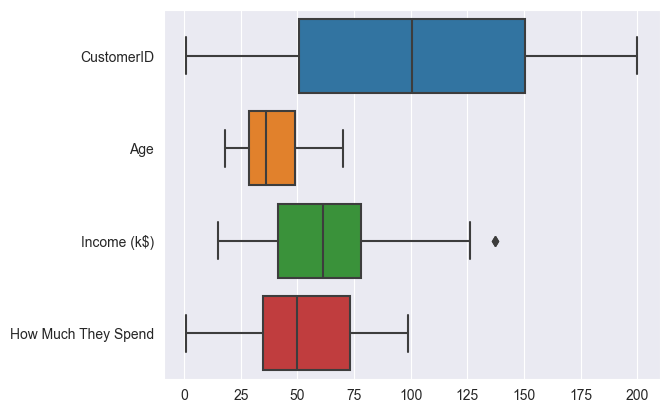

In [10]:
#for i, y_temp in enumerate(["CustomerID", "Age", "Income (k$)", "How Much They Spend"]):
fig = plt.figure()
sns.boxplot(data=df_eda, orient="h")
plt.show()

C:\Users\ianli_gu6oysd\AppData\Local\Temp\ipykernel_23788\2784162778.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_eda.hist(bins=30, ax=ax)


array([[<AxesSubplot: title={'center': 'CustomerID'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'Income (k$)'}>,
        <AxesSubplot: title={'center': 'How Much They Spend'}>]],
      dtype=object)

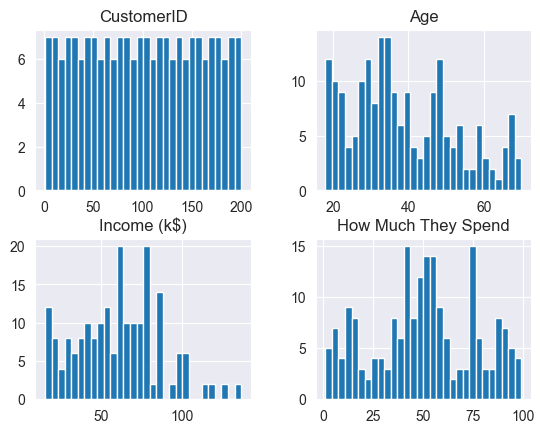

In [11]:
fig, ax = plt.subplots()
df_eda.hist(bins=30, ax=ax)

<AxesSubplot: ylabel='Gender'>

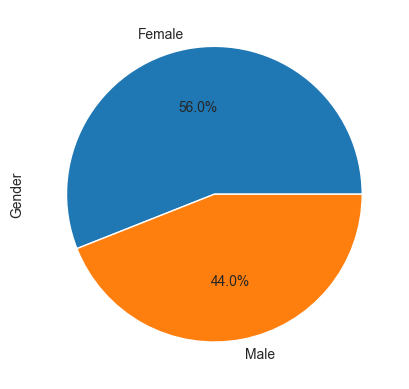

In [12]:
df_eda["Gender"].value_counts().plot.pie(
    autopct="%1.1f%%",
    explode=(0, 0)
    )

# Bivirate Analysis

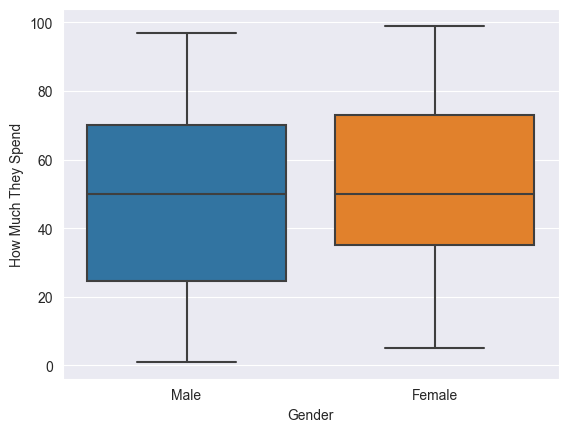

In [13]:
fig, ax = plt.subplots()
sns.boxplot(data=df_eda, x="Gender", y="How Much They Spend")
plt.show()

Assigning the value of 1 to Male, and 0 to female

In [14]:
df_eda["Gender"] = pd.Series(
    np.where(df_eda["Gender"].values == "Male", 1, 0), df_eda.index
)

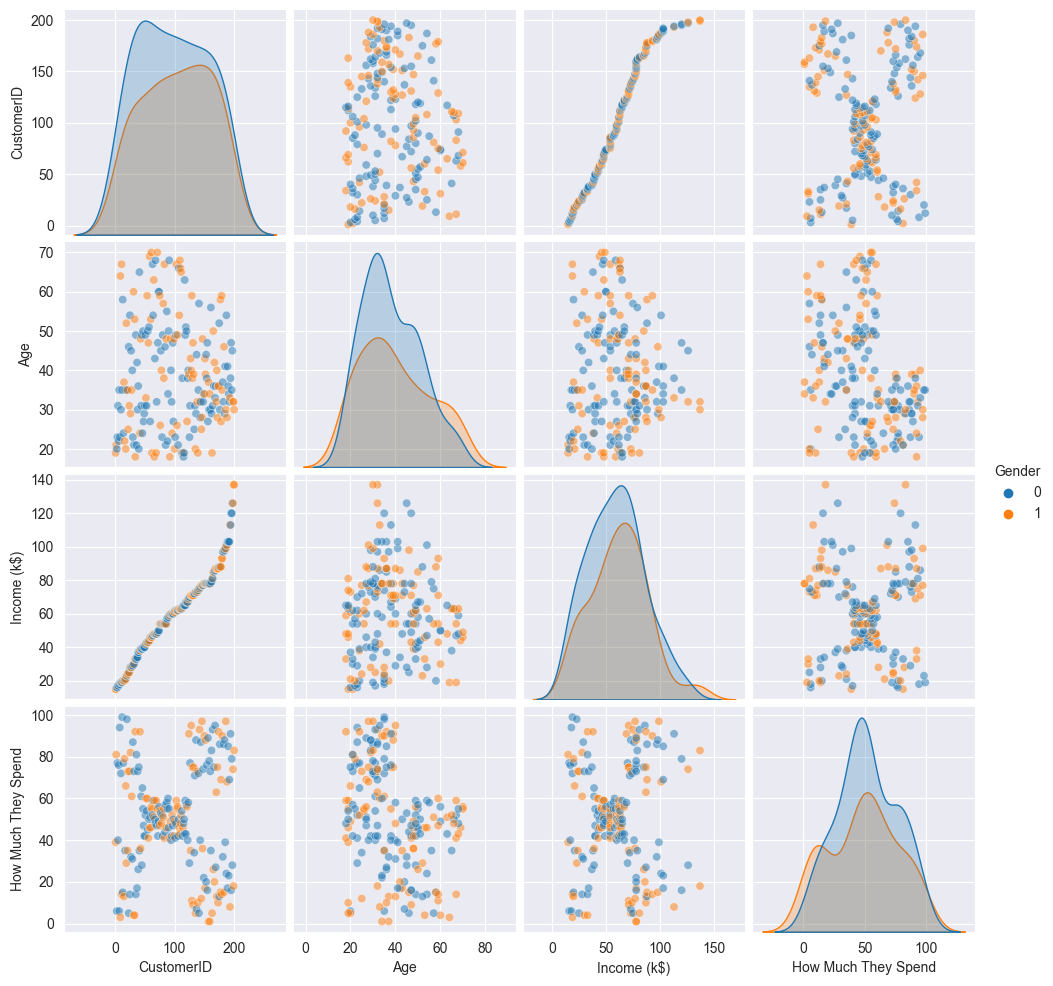

In [15]:
sns.pairplot(data=df_eda, hue="Gender", plot_kws={"alpha": 0.5})
plt.show()

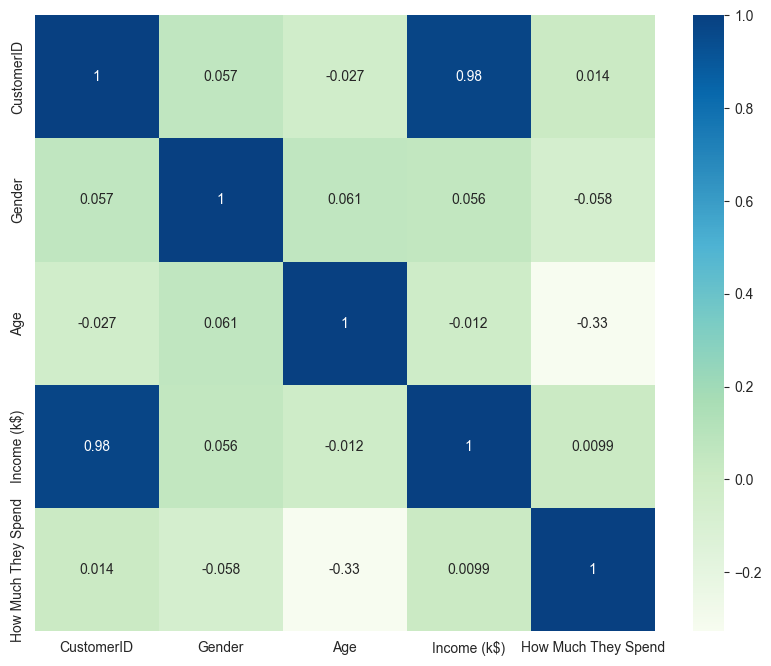

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df_eda.corr(), annot=True, cmap="GnBu")
plt.show()

In [17]:
df = df.drop(columns=["CustomerID"])

# Encoding

##### We have multiple choices of Encoding methods here:

1. One Hot Encoding
    - One Hot encoding has the disadvantage of creating a high-dimentional and sparse representation when dealing with large number of categories. Gender do not have many categories, only haveing 2, male and female. And thus this is not an issue. Thus I will use this encoding method
2. Label Encoding
    - Label encoding would introduce abitrary ordinal relationships between categories which might mislead the learning algorithm. So we will not use it.
3. Ordinal Encoding
    - It assumes uniform differences between my encoded values. Which is not the case here. Thus I will not use this encoding method.
4. Count Encoding
    - This normally results in overfitting. Even though my correlation of my target variable has a very low correlation to variables. Thus there should be no issues, however, I will use One Hot encoding as it is more suitable for this type of categorical data, and I do not want to show the frequency of my data.
5. Binary Encoding
    - It assumes that the order of my categories matters. In this case, gender, or marriage status does not have an order. Thus I will not use this encoding method.
6. Target Encoding
    - This encoding method generally leads to overfitting when there are a low number of entries in the dataset. The provided dataset has very few values. Thus I will not use this encoding method.

In [18]:
df.head()

,Gender,Age,Income (k$),How Much They Spend
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [19]:
# hot_col = ["Gender"]
# ohe = OneHotEncoder()
# ohe.fit(df[hot_col])
# df = pd.concat([
#     df.drop(hot_col, axis=1).reset_index(drop=True),
#     pd.DataFrame(
#         ohe.transform(df[hot_col]).toarray(),
#         columns=ohe.get_feature_names_out(),
#     ),
# ],
# axis=1)
# display(df.head())

df = pd.get_dummies(df)
df = df.drop(columns = ["Gender_Female"])
df = df.rename(columns = {"Gender_Male":"Gender"})
display(df.head())

,Age,Income (k$),How Much They Spend,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# Standardizing

Standardizing is to help the model compute the data with more ease, and to help ensure that the machine algorithm has different features on a similar scale.

1. Z-Score Standardization (Standard Scaler)
    - This is good for preserving the original distribution and shape.
    - Not good at handling outliers.
    - Requires Gaussian distribution.

2. Min-Max Scaling
    - Useful when wanting to preserve the relationships between data points.
    - Cannot handle outliers.
3. Unit Vector Scaling
    - Not as sensitive to outliers
    - Very useful to datasets with a lot of outliers
    - Requires Gaussian distribution
4. Unit Vector Scaling
    - Useful for sparse data
    - Does not maintain original relationships between data points


In order to identify the correct type of scaler to use, I will use the Shapiro Wilk Test, the Anderson Darling Test, a Histogram, and a Probability Plot to see whether there is Gaussian Distribution.

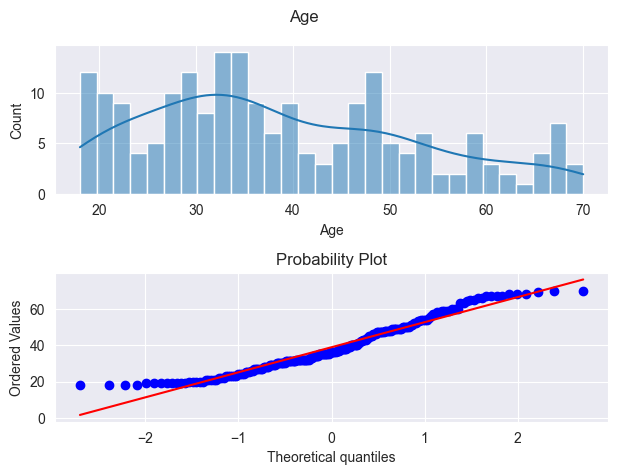

Shapiro-Wilk Test:
Statistic: 0.9516184329986572
p-value: 2.7109526854474097e-06

Anderson-Darling Test:
Statistic: 2.489094012240969
Critical Values: [0.565 0.644 0.772 0.901 1.071]


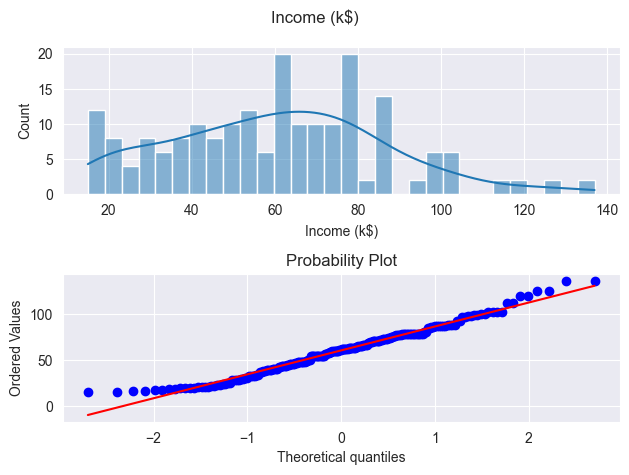

Shapiro-Wilk Test:
Statistic: 0.9783905148506165
p-value: 0.003537340322509408

Anderson-Darling Test:
Statistic: 0.6844419180561658
Critical Values: [0.565 0.644 0.772 0.901 1.071]


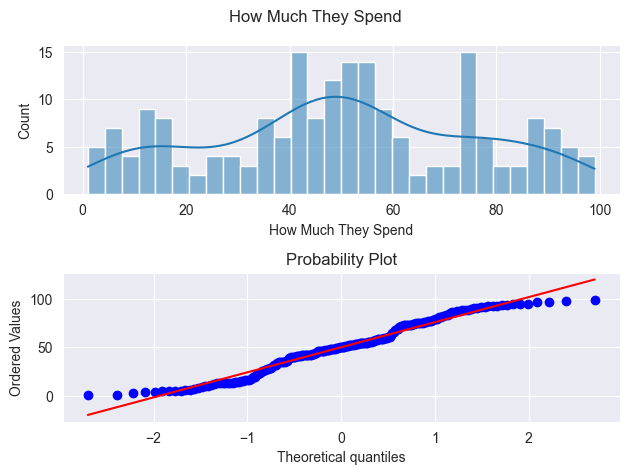

Shapiro-Wilk Test:
Statistic: 0.9694603085517883
p-value: 0.00024227304675150663

Anderson-Darling Test:
Statistic: 1.3506265307220815
Critical Values: [0.565 0.644 0.772 0.901 1.071]


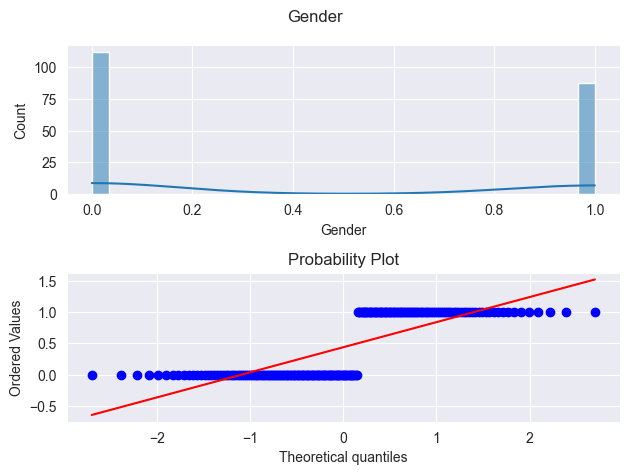

Shapiro-Wilk Test:
Statistic: 0.6311769485473633
p-value: 1.4683150575283815e-20

Anderson-Darling Test:
Statistic: 36.45581771597631
Critical Values: [0.565 0.644 0.772 0.901 1.071]


In [20]:
for i in df.columns:
    fig, ax = plt.subplots(2, 1)
    sns.histplot(data=df[i], bins=30, ax=ax[0], kde=True)
    stats.probplot(df[i], plot=ax[1])
    plt.suptitle(i)
    plt.tight_layout()
    plt.show()

    statistic, p_value = stats.shapiro(df[i])
    print("Shapiro-Wilk Test:")
    print("Statistic:", statistic)
    print("p-value:", p_value)

    result = stats.anderson(df[i])
    print("\nAnderson-Darling Test:")
    print("Statistic:", result.statistic)
    print("Critical Values:", result.critical_values)


From the above tests, we can observe that the histograms have a smooth curve, and are pretty bell shaped. Income and Age are slightly scewed to the left, however the rest are not.

Thus we can assume that they have Gaussian Distribution.

Along with this, I would like to maintain the relationships between datapoints. Age, Income, and Amount They Spend also have differing units.

Thus I will use Standard Scaler Scaling for this dataset as it is the most suitable in this situation.

In [21]:
num_cols = [
    "Age",
    "Income (k$)",
    "How Much They Spend",
]
scale = StandardScaler()

scaled_df_copy = df.copy()
scaled_df_copy[num_cols] = scale.fit_transform(df[num_cols])

scaled_df_copy.head()

,Age,Income (k$),How Much They Spend,Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


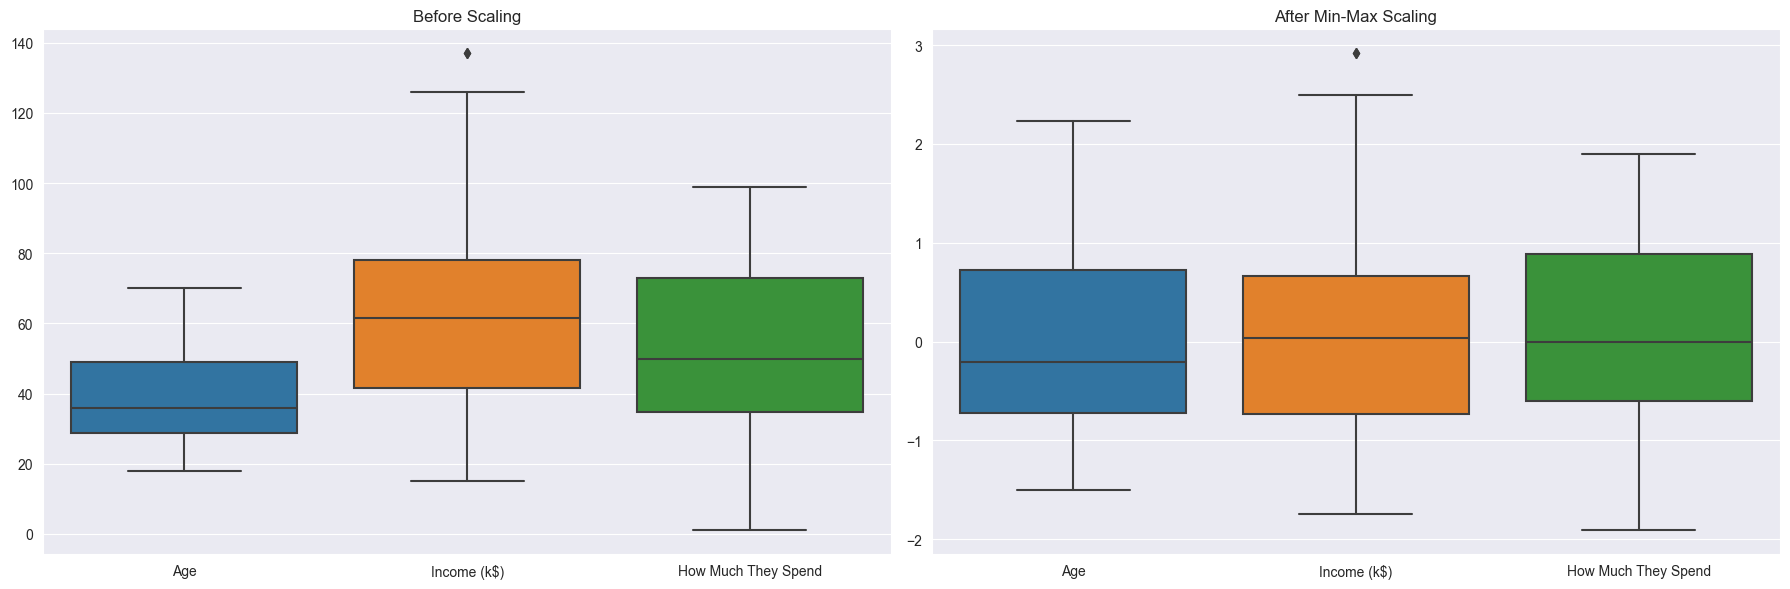

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6), tight_layout=True)
sns.boxplot(df[num_cols], ax=ax[0])
ax[0].set_title('Before Scaling')
sns.boxplot(scaled_df_copy[num_cols], ax=ax[1])
ax[1].set_title('After Min-Max Scaling')
plt.show()

# Hopkins Clustering Tendency Test

This is a test to determine the clustering tendencies of my data.

High Hopkins Statitics:

- Value close to 1. Means that there is a high tendency of clustering. This means that the data is likely to have meaningful clusters.

Low Hopkins Statistics:

- Value close to 0. This means that there is a low tendency of clustering. This means that the data is not likely to perform well.

In [23]:
def hopkins(X):
   d = X.shape[1]
   #d = len(vars) # columns
   n = len(X) # rows
   m = int(0.1 * n) # heuristic from article [1]
   nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

   rand_X = sample(range(0, n, 1), m)

   ujd = []
   wjd = []
   for j in range(0, m):
      u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
      ujd.append(u_dist[0][1])
      w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
      wjd.append(w_dist[0][1])

   H = sum(ujd) / (sum(ujd) + sum(wjd))
   if isnan(H):
      print(ujd, wjd)
      H = 0

   return H

hopkins(scaled_df_copy)

0.7255669389109841

### Observations:

As we can see from the value 0.53 above, the hopkins statistics is above 0.5. However is still very close to 0.5. This would mean that the data is randomly distributed, and somewhat has the tendency to cluster, however it is a very weak tendency.

In this case, normal approaches are to apply PCA to help with the weak tendency to cluster. However my dataset is very small. Thus this will not be feasible.

However I can still try using Gower Distance to solve this issue

# Silouette Coefficient

c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

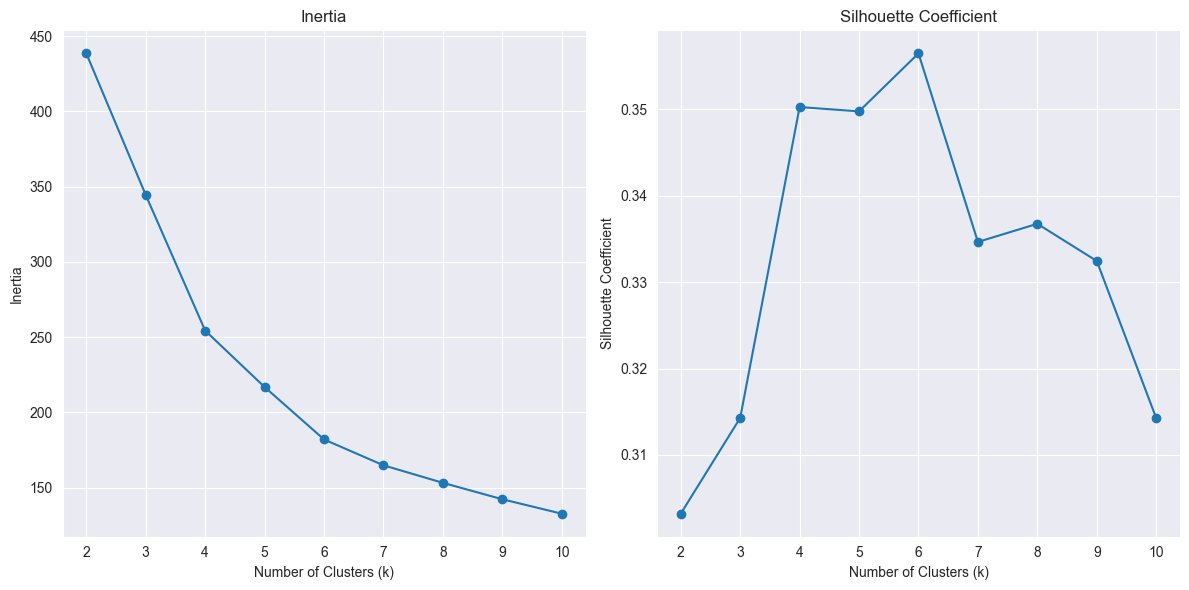

Highest Silhouette Score: 0.3565 (k = 6)


In [24]:
def visualize_kmeans_metrics(data, k_range):
    inertias = []
    silhouette_scores = []

    for k in k_range:
        modelling = KMeans(n_clusters=k, random_state=42)
        modelling.fit(data)
        inertias.append(modelling.inertia_)
        
        silhouette_scores.append(silhouette_score(data, modelling.labels_))

    plt.figure(figsize=(12, 6))
    
    # Plot Inertia
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title(f'Inertia')
    
    # Plot Silhouette Coefficient
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Coefficient')
    plt.title(f'Silhouette Coefficient')

    plt.tight_layout()
    plt.show()

    # Find the index of the highest silhouette score
    best_index = np.argmax(silhouette_scores)
    best_k = k_range[best_index]
    best_score = silhouette_scores[best_index]
    
    print(f"Highest Silhouette Score: {best_score:.4f} (k = {best_k})")

k_range = range(2, 11)  # Range of k values to explore
visualize_kmeans_metrics(scaled_df_copy, k_range)

### Observations:

We can see from the above that The Inertia decreases with the amount of clusters, whilst the Silhouette coefficient increases until its peak at 6. Of which it drops after.

I will use a number of clusters as 6 as it produces the highest Silhouette Score.

In [25]:
best_k = 6

# Modelling

### For the grading of my models, I will be using the following:

- Silhouette Score:
    - The silhouette score measures the distance between the clusters and the separation between different clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters.

- Davies-Bouldin Index:
    - The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster. A lower value indicates better clustering.

- Calinski-Harabasz Index (Variance Ratio Criterion):
    - This index measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate better-defined clusters.

In [26]:
def visualize_clusters(model, data, labels, column1, column2, title):
    cluster_labels = model.fit_predict(data)
    
    # Check the number of unique cluster labels
    unique_labels = len(np.unique(cluster_labels))
    if unique_labels < 2:
        print(f"Skipping calculation for {title}: Less than 2 clusters.")
        return None
    
    # Visualize clusters
    plt.scatter(data[:, column1], data[:, column2], c=cluster_labels, cmap='viridis')
    plt.title('Cluster Visualization')
    plt.xlabel(labels[column1])
    plt.ylabel(labels[column2])
    plt.title(title)
    plt.show()

    # Calculate metrics
    silhouette_avg = silhouette_score(data, cluster_labels)
    davies_bouldin = davies_bouldin_score(data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(data, cluster_labels)

    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Score: {davies_bouldin}')
    print(f'Calinski-Harabasz Score: {calinski_harabasz}')

    return [silhouette_avg, davies_bouldin, calinski_harabasz]


c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


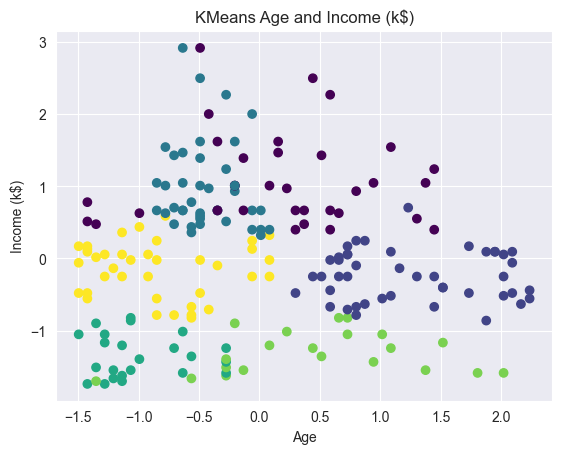

Silhouette Score: 0.356485834425401
Davies-Bouldin Score: 1.0050904211940697
Calinski-Harabasz Score: 99.65487851108833


c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


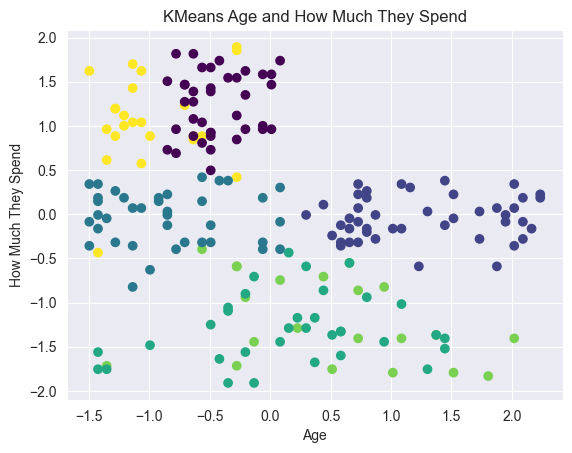

Silhouette Score: 0.356485834425401
Davies-Bouldin Score: 1.0050904211940697
Calinski-Harabasz Score: 99.65487851108833


c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


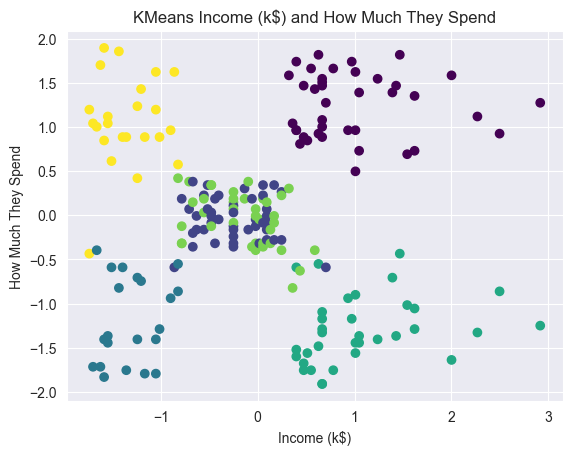

Silhouette Score: 0.356485834425401
Davies-Bouldin Score: 1.0050904211940697
Calinski-Harabasz Score: 99.65487851108833


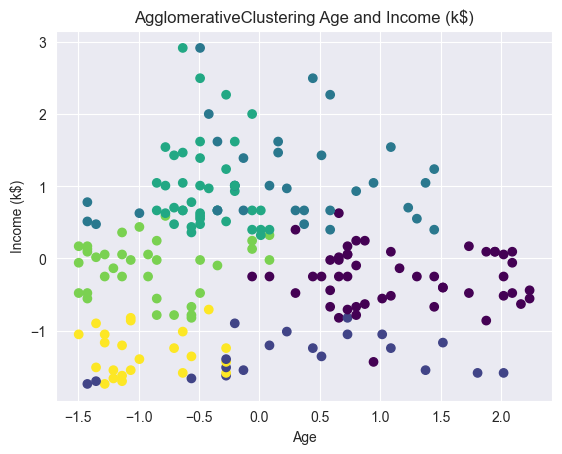

Silhouette Score: 0.3504439354681972
Davies-Bouldin Score: 1.0086149926438526
Calinski-Harabasz Score: 95.2576612909977


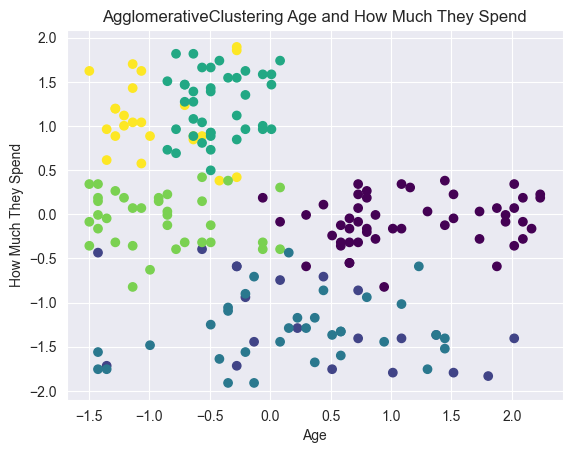

Silhouette Score: 0.3504439354681972
Davies-Bouldin Score: 1.0086149926438526
Calinski-Harabasz Score: 95.2576612909977


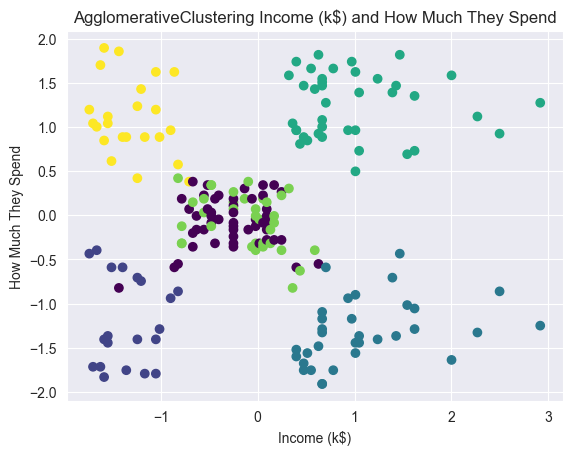

Silhouette Score: 0.3504439354681972
Davies-Bouldin Score: 1.0086149926438526
Calinski-Harabasz Score: 95.2576612909977


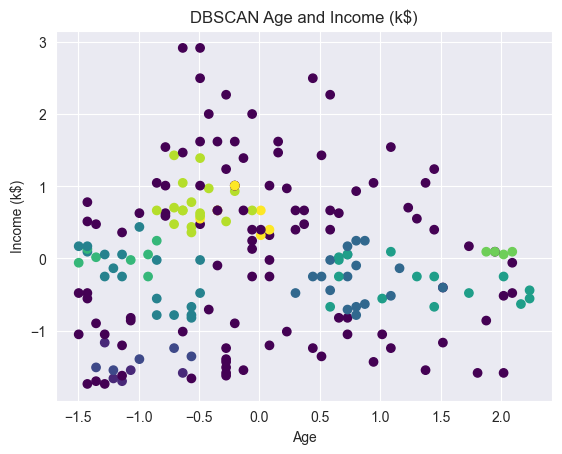

Silhouette Score: -0.011387465358068827
Davies-Bouldin Score: 1.5008184621600702
Calinski-Harabasz Score: 10.8905686733236


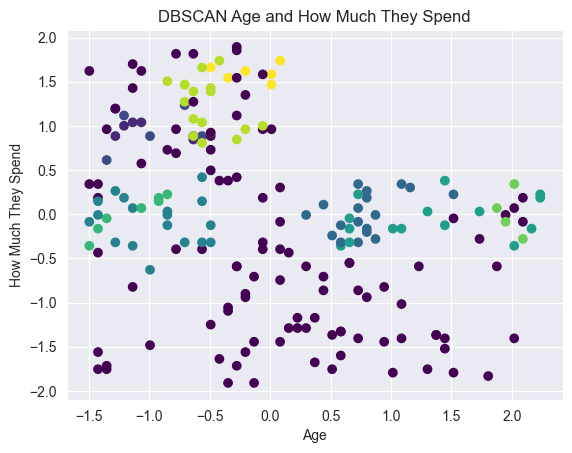

Silhouette Score: -0.011387465358068827
Davies-Bouldin Score: 1.5008184621600702
Calinski-Harabasz Score: 10.8905686733236


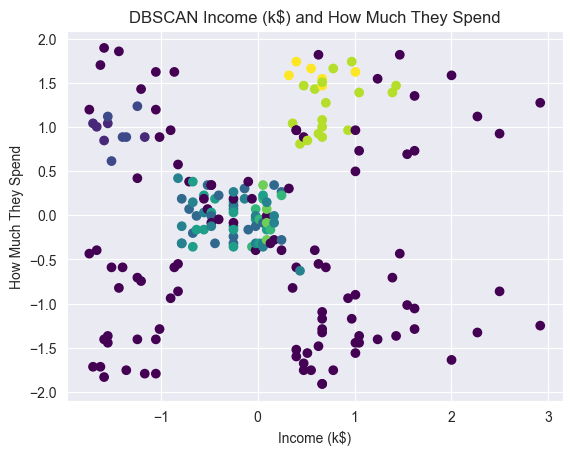

Silhouette Score: -0.011387465358068827
Davies-Bouldin Score: 1.5008184621600702
Calinski-Harabasz Score: 10.8905686733236


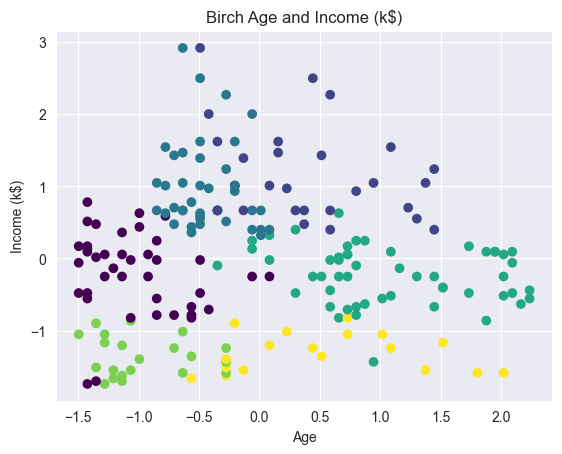

Silhouette Score: 0.3515225000881796
Davies-Bouldin Score: 1.0242115049410312
Calinski-Harabasz Score: 92.61675009985144


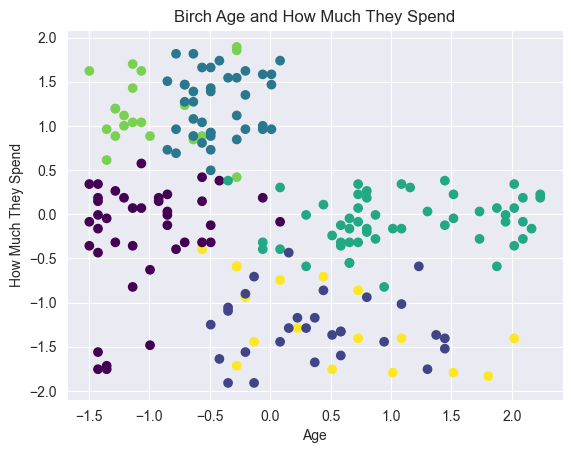

Silhouette Score: 0.3515225000881796
Davies-Bouldin Score: 1.0242115049410312
Calinski-Harabasz Score: 92.61675009985144


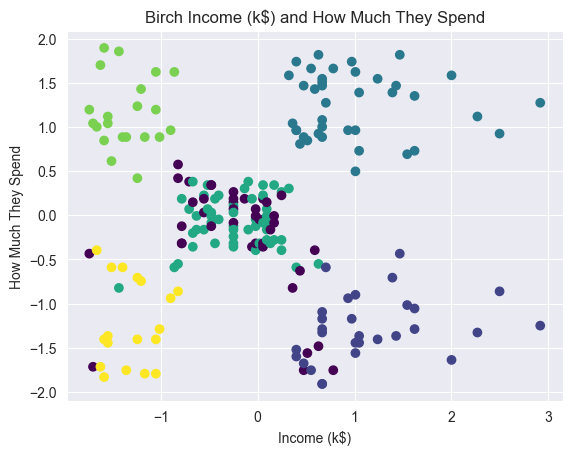

Silhouette Score: 0.3515225000881796
Davies-Bouldin Score: 1.0242115049410312
Calinski-Harabasz Score: 92.61675009985144
Skipping calculation for MeanShift Age and Income (k$): Less than 2 clusters.
Skipping calculation for MeanShift Age and How Much They Spend: Less than 2 clusters.
Skipping calculation for MeanShift Income (k$) and How Much They Spend: Less than 2 clusters.


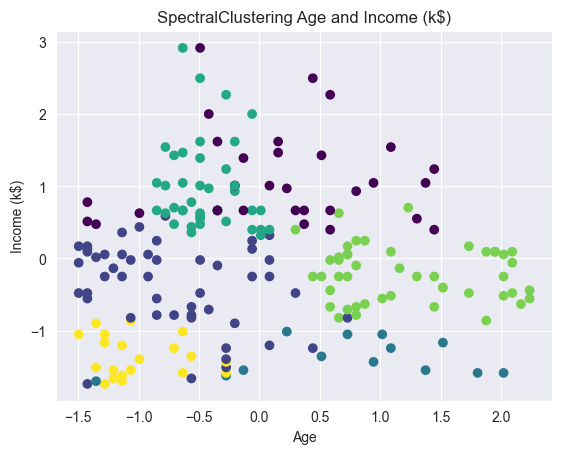

Silhouette Score: 0.34899584272362427
Davies-Bouldin Score: 0.9873092325671253
Calinski-Harabasz Score: 92.76558033313168


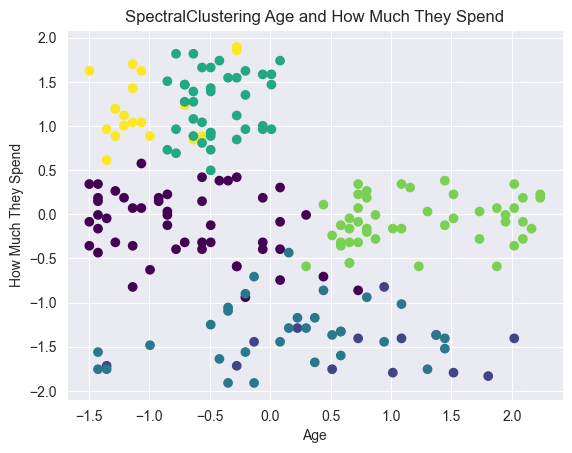

Silhouette Score: 0.34899584272362427
Davies-Bouldin Score: 0.9873092325671253
Calinski-Harabasz Score: 92.76558033313168


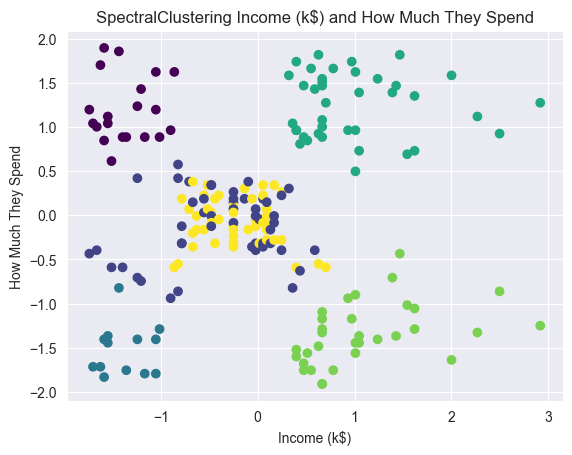

Silhouette Score: 0.34899584272362427
Davies-Bouldin Score: 0.9873092325671254
Calinski-Harabasz Score: 92.7655803331317


In [27]:
models = {
    'KMeans': KMeans(n_clusters=best_k),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=best_k),
    'DBSCAN': DBSCAN(),
    'Birch': Birch(n_clusters=best_k),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=best_k)
}

# Assuming scaled_df_copy is your processed dataset
data = scaled_df_copy.values
feature_labels = scaled_df_copy.columns 

# Visualize clusters and calculate scores
model_names = []
combinations_list = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

numbers = [0, 1, 2]

for model_name, model in models.items():
    for comb in combinations(numbers, 2):
        num1, num2 = comb
        values = visualize_clusters(model, data, feature_labels, num1, num2, model_name + " " + feature_labels[num1] + " and " + feature_labels[num2])
        if values is not None:
            model_names.append(model_name)
            combinations_list.append(", ".join((feature_labels[num1], feature_labels[num2])))
            silhouette_scores.append(values[0])
            davies_bouldin_scores.append(values[1])
            calinski_harabasz_scores.append(values[2])

Since The Graphs are all very hard to compare, we will use the Silhoutee Score, Davies-Bouldin Score, and the Calinski-Harabasz Score in the display below

In [28]:
# Create a DataFrame from the lists
results_df = pd.DataFrame({
    'Model': model_names,
    'Combination': combinations_list,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Score': davies_bouldin_scores,
    'Calinski-Harabasz Score': calinski_harabasz_scores
})

def highlight_best_worst(s):
    worst_indices = s.argsort()[:3]
    best_indices = s.argsort()[-3:]
    is_worst = s.index.isin(worst_indices)
    is_best = s.index.isin(best_indices)
    styles = [''] * len(s)
    
    for i, (best, worst) in enumerate(zip(is_best, is_worst)):
        if best:
            styles[i] = 'background-color: green'
        elif worst:
            styles[i] = 'background-color: red'
            
    return styles

styled_df = results_df.style.apply(highlight_best_worst, subset=['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score'], axis=0)

display(styled_df)

,Model,Combination,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,KMeans,"Age, Income (k$)",0.356486,1.005090,99.654879
1,KMeans,"Age, How Much They Spend",0.356486,1.005090,99.654879
2,KMeans,"Income (k$), How Much They Spend",0.356486,1.005090,99.654879
3,AgglomerativeClustering,"Age, Income (k$)",0.350444,1.008615,95.257661
4,AgglomerativeClustering,"Age, How Much They Spend",0.350444,1.008615,95.257661
5,AgglomerativeClustering,"Income (k$), How Much They Spend",0.350444,1.008615,95.257661
6,DBSCAN,"Age, Income (k$)",-0.011387,1.500818,10.890569
7,DBSCAN,"Age, How Much They Spend",-0.011387,1.500818,10.890569
8,DBSCAN,"Income (k$), How Much They Spend",-0.011387,1.500818,10.890569
9,Birch,"Age, Income (k$)",0.351523,1.024212,92.616750


### Observations:

KMeans has the best silhouette Score and Calinski Harabasz Score.

DBScan has the best Davies Bouldin Score, however has the worst Silhouette Score and Calinski Harabasz Score.

Spectral Clustering has the worst Davies Bouldin Score.

Thus I will continue with the 3 best models I have:
1. KMeans
2. Agglomerative Clustering
3. Birch

In [29]:
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

In [30]:
param_grid = {
    'n_clusters': [6],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'n_init': [10, 20, 30]
}

# Create an instance of KMeans and GridSearchCV
model = KMeans()
km_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)

km_grid_search.fit(scaled_df_copy)

print("Best Parameters:", km_grid_search.best_params_)
print("Best Score:", km_grid_search.best_score_)

Best Parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 6, 'n_init': 10}
Best Score: 0.4083131716351288


In [31]:
param_grid = {
    'n_clusters': [6],
    'linkage': ['ward', 'complete', 'average', 'single']
}

# Create an instance of KMeans and GridSearchCV
model = AgglomerativeClustering()
aggc_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)

aggc_grid_search.fit(scaled_df_copy)

print("Best Parameters:", aggc_grid_search.best_params_)
print("Best Score:", aggc_grid_search.best_score_)

Best Parameters: {'linkage': 'ward', 'n_clusters': 6}
Best Score: 0.38815008886675934


In [32]:
param_grid = {
    'threshold': np.linspace(0.1, 1.0, 10),
    'branching_factor': [20, 30, 40, 50],
    'n_clusters': [6]
}

# Create an instance of KMeans and GridSearchCV
model = Birch()
bc_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)

bc_grid_search.fit(scaled_df_copy)

print("Best Parameters:", bc_grid_search.best_params_)
print("Best Score:", bc_grid_search.best_score_)

Best Parameters: {'branching_factor': 20, 'n_clusters': 6, 'threshold': 1.0}
Best Score: 0.45200553934226556


### Observations

Based on my hypertuned models, the Birch out performs the other two models. Thus I will take this as my final model

In [33]:
bc_grid_search.best_estimator_

Birch(branching_factor=20, n_clusters=6, threshold=1.0)

In [34]:
scaled_df_copy.head()

,Age,Income (k$),How Much They Spend,Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [35]:
properties_to_visualize = ['Age', 'Income (k$)', 'How Much They Spend', 'Gender']

predicted_clusters = km_grid_search.predict(scaled_df_copy[properties_to_visualize])
km_df = scaled_df_copy.copy()
km_df['Cluster'] = predicted_clusters
display(km_df.head())

,Age,Income (k$),How Much They Spend,Gender,Cluster
0,-1.424569,-1.738999,-0.434801,1,4
1,-1.281035,-1.738999,1.195704,1,4
2,-1.352802,-1.700830,-1.715913,0,1
3,-1.137502,-1.700830,1.040418,0,4
4,-0.563369,-1.662660,-0.395980,0,1


In [37]:
best_kmeans_model = km_grid_search.best_estimator_

# Assuming you have scaled data and a trained KMeans model
scaled_data = scaled_df_copy
kmeans_model = best_kmeans_model

# 1. Fit the scaler with original data and then inverse transform
scaler = StandardScaler()  # Use the appropriate scaler that you used before
scaler.fit(df)  # Fit the scaler with your original unscaled data
original_data = scaler.inverse_transform(scaled_data)

# 2. Reverse Scaling on Centroids
scaled_centroids = kmeans_model.cluster_centers_
original_centroids = scaler.inverse_transform(scaled_centroids)

# Perform the KMeans clustering on the original data
kmeans_model.fit(original_data)

KMeans(n_clusters=6, n_init=10)

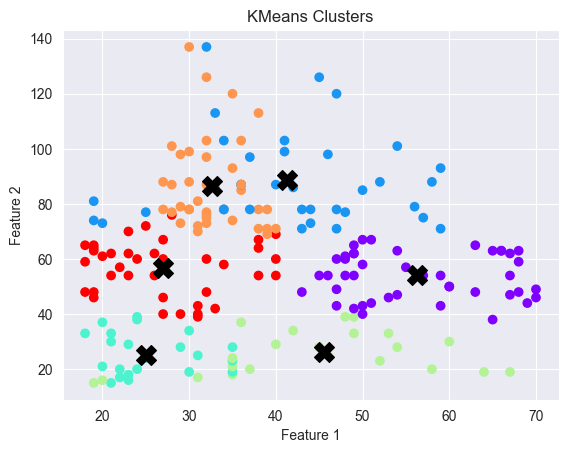

In [38]:
# Visualize the clusters using the original data
plt.scatter(original_data[:, 0], original_data[:, 1], c=best_kmeans_model.labels_, cmap='rainbow')
plt.scatter(original_centroids[:, 0], original_centroids[:, 1], marker='X', s=200, c='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('KMeans Clusters')
plt.show()

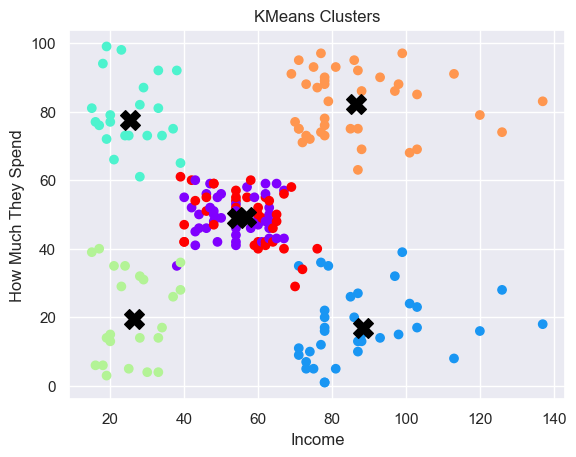

In [43]:
# Visualize the clusters using the original data
plt.scatter(original_data[:, 1], original_data[:, 2], c=best_kmeans_model.labels_, cmap='rainbow')
plt.scatter(original_centroids[:, 1], original_centroids[:, 2], marker='X', s=200, c='black')
plt.xlabel('Income')
plt.ylabel('How Much They Spend')
plt.title('KMeans Clusters')
plt.show()

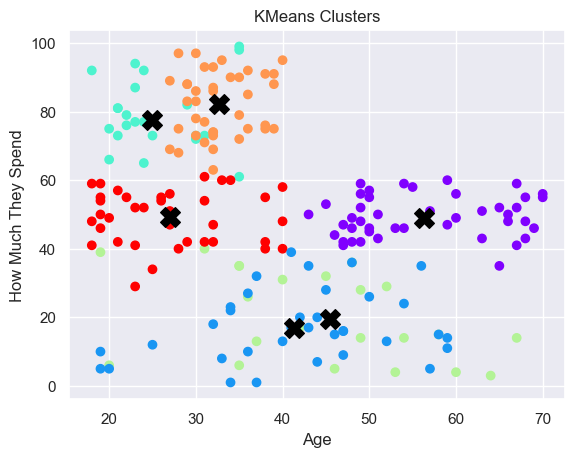

In [44]:
# Visualize the clusters using the original data
plt.scatter(original_data[:, 0], original_data[:, 2], c=best_kmeans_model.labels_, cmap='rainbow')
plt.scatter(original_centroids[:, 0], original_centroids[:, 2], marker='X', s=200, c='black')
plt.xlabel('Age')
plt.ylabel('How Much They Spend')
plt.title('KMeans Clusters')
plt.show()

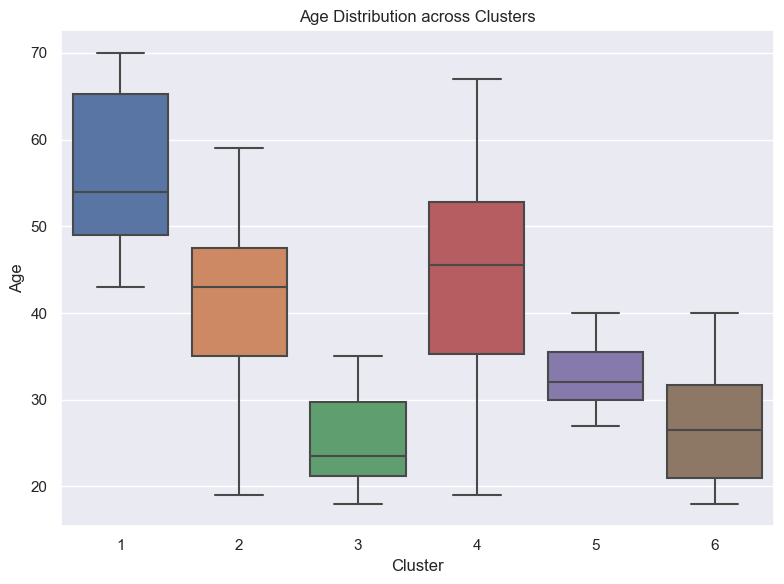

In [42]:
cluster_labels = best_kmeans_model.labels_

# Create a box plot to compare Age across clusters using Seaborn
sns.set(style="darkgrid")  # Set Seaborn style
plt.figure(figsize=(8, 6))
sns.boxplot(x=cluster_labels, y=original_data[:, 0])
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Age Distribution across Clusters')
plt.xticks(range(best_kmeans_model.n_clusters), range(1, best_kmeans_model.n_clusters + 1))
plt.tight_layout()
plt.show()

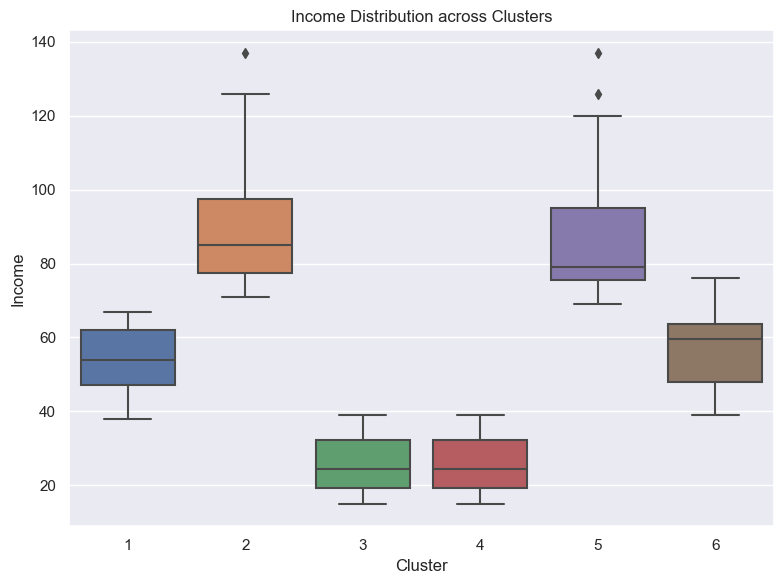

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cluster_labels, y=original_data[:, 1])
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.title('Income Distribution across Clusters')
plt.xticks(range(best_kmeans_model.n_clusters), range(1, best_kmeans_model.n_clusters + 1))
plt.tight_layout()
plt.show()

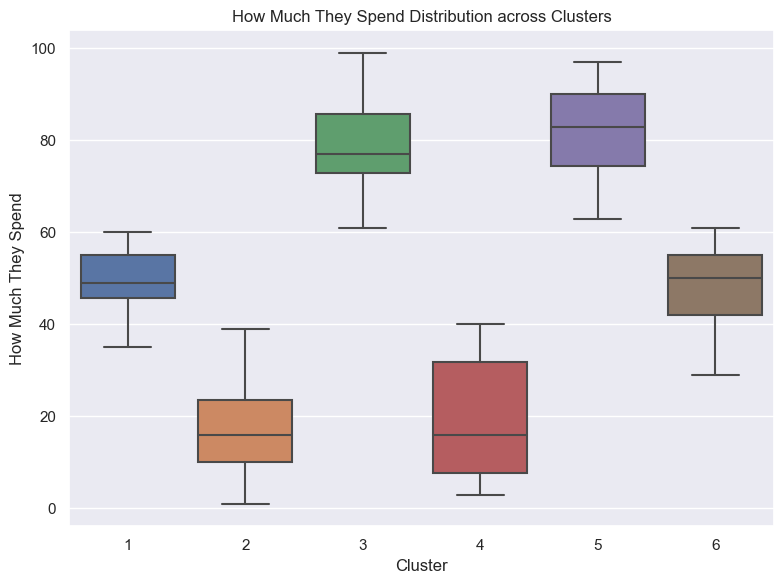

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cluster_labels, y=original_data[:, 2])
plt.xlabel('Cluster')
plt.ylabel('How Much They Spend')
plt.title('How Much They Spend Distribution across Clusters')
plt.xticks(range(best_kmeans_model.n_clusters), range(1, best_kmeans_model.n_clusters + 1))
plt.tight_layout()
plt.show()